# Статистические функции Python

Для начала разогреемся

## Сравнение наборов данных
Импортируйте данные из файла

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets.csv', sep=';')
df.head()

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47


Давайте посмотрим на среднее

In [23]:
df.mean()

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

А теперь на среднеквадратичное отклонение

In [24]:
df.std()

x1    3.316625
y1    2.031568
x2    3.316625
y2    2.031657
x3    3.316625
y3    2.030424
x4    3.316625
y4    2.030579
dtype: float64

In [27]:
df.describe() # все описательные статистики.
# проценты - это квартили
# делаем вывод о том, что данные не сгенерированы по одинаковому принципу из-за отличия в мин макс значениях, а также отличия в квартилях

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


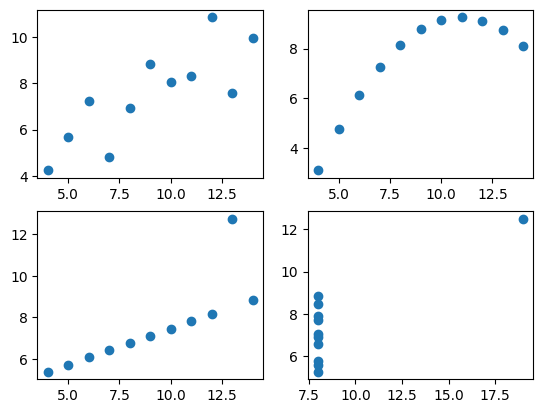

In [31]:
plt.subplot(2,2,1)
plt.scatter(df['x1'], df['y1'])

plt.subplot(2,2,2)
plt.scatter(df['x2'], df['y2'])

plt.subplot(2,2,3)
plt.scatter(df['x3'], df['y3'])

plt.subplot(2,2,4)
plt.scatter(df['x4'], df['y4'])

# ANS combo стараемся визуализировать данные, чтобы посмотреть на них с разных сторон. это используется в комбинации с описательными статистиками

## Биномиальное распределение

Давайте предположим, что мы хотим провести эксперимент с новым лекарственным препаратом

In [32]:
# импорт необходимых библиотек
import numpy as np
from scipy.stats import binom
from matplotlib.pyplot import xticks

Предположим, у нас есть препарат, который излечивает людей с вероятностью 50%. Т.е. конверсия в здорового человека 0.5.

In [34]:
'''
Предполагаем, что есть препарат, который излечивает с вероятностью 50%.
Мы разработали новый препарат и протестировали на испытуемых. Собрали данные. Начинаем их обрабатывать
'''

current_pill_efficiency = 0.5 # вероятность излечения

И теперь мы разработали новый препарат, который был протестирован на N пациентах и вот какие результаты мы получили (`1`-вылечили, `0`-не вылечили):

In [35]:
new_pill_efficiency = [1,1,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,0,0,0,1]
# данные, собранные с пациентов: 1- вылечен, 0 - невылечен

Давайте посчитаем конверсию

In [36]:
print(f'{sum(new_pill_efficiency)} conversions out of {len(new_pill_efficiency)}')
# смотрим на конверсию (эффективность)

35 conversions out of 60


In [38]:
print(f'new pill conversion efficiency is {sum(new_pill_efficiency)/len(new_pill_efficiency)}')
# считаем конверсию

new pill conversion efficiency is 0.5833333333333334


А как понять, статистически значимое это отклонение или нет?

Для начала давайте визуализируем биномиальное распределение c характеристиками 
- `n = 60`
- `p = 0.5`

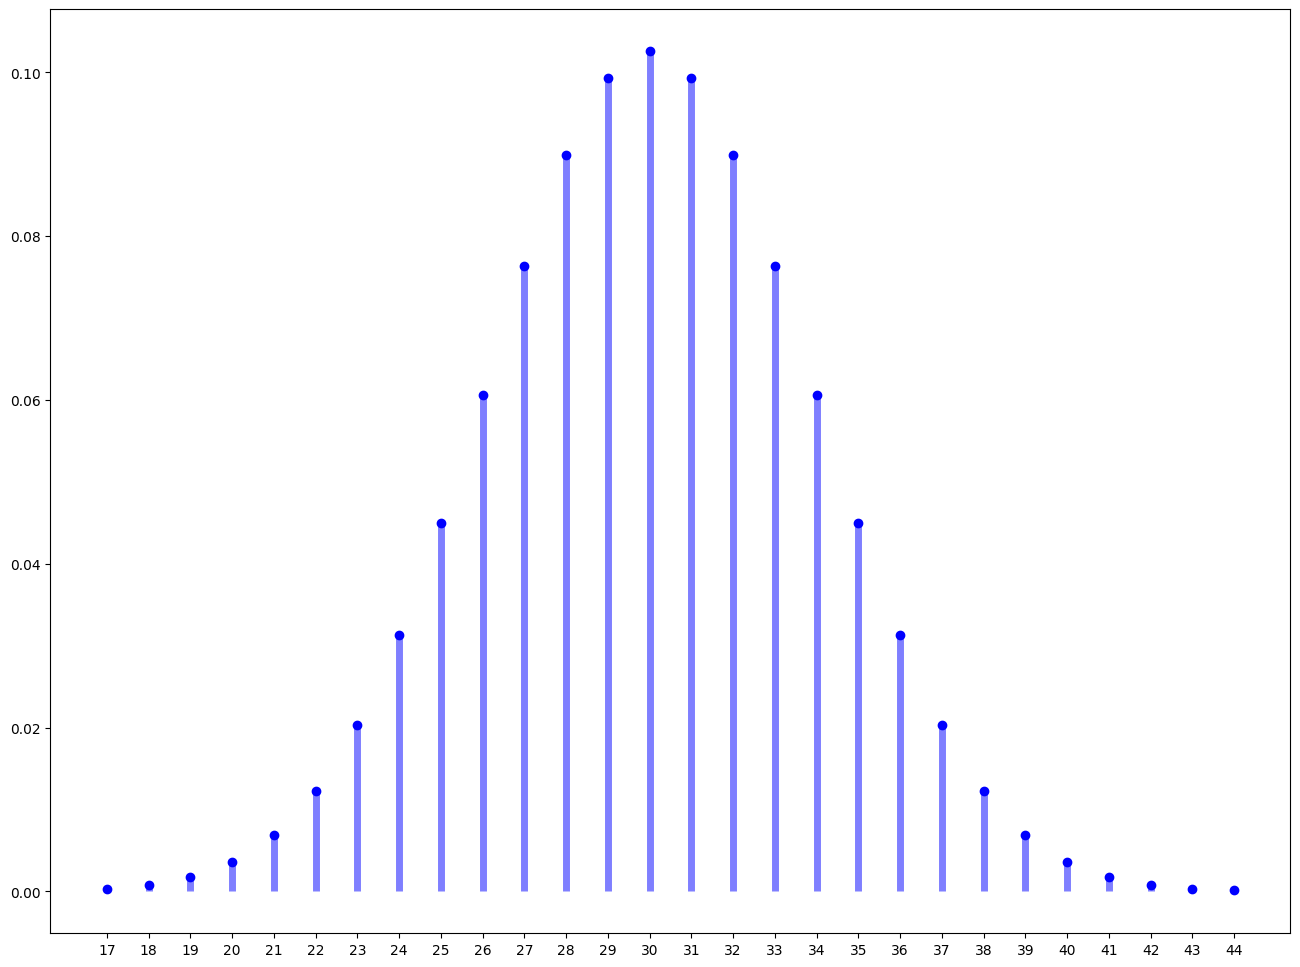

In [42]:
n, p = 60, 0.5
x = [i for i in range(17, 45)]
fig, ax = plt.subplots(1, 1,figsize=(16, 12));
ax.plot(x, binom.pmf(x, n, p), 'bo', label='binom pmf');
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);
locs, labels = xticks();
xticks(np.arange(17, 45));
# какая вероятность что новый препарат имеет большую эффективность, по сравнению со старым?
# смотрим на более вероятные исходы в этом эксперименте. используем распределение бернули, так как у нас p = 0.5, q = 1 - p
# по оси х у нас показывается количество человек 
# так как вероятность, что 10 человек у нас излечится из всего набора - очень мала. Поэтому сдвигаем границу (обрезаем края)

А теперь посмотрим на кумулятивную функцию распределения. Ответим на вопрос, чему равна вероятность, что функция от случайной величины примет значение равное или меньшее x.

Посмотрим на функцию распределения

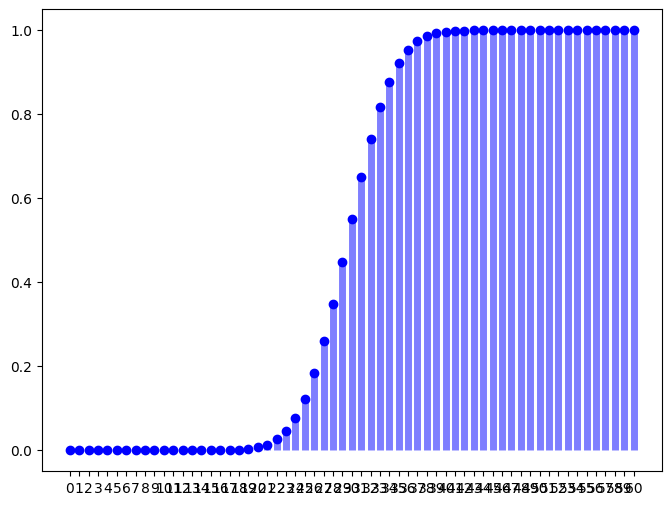

In [43]:
# Кумулуятивная функция - какая вероятность, что наша случайная веричина примет значение меньше того значения, которое мы хотим рассмотреть
# суммируем все высоты столбцов до интересующего нас значения. высота - вероятность исхода
n, p = 60, 0.5
x = [i for i in range(61)]
fig, ax = plt.subplots(1, 1,figsize=(8, 6));
ax.plot(x, binom.cdf(x, n, p), 'bo', label='binom pmf');
ax.vlines(x, 0, binom.cdf(x, n, p), colors='b', lw=5, alpha=0.5);
locs, labels = xticks();
xticks(np.arange(61));

In [10]:
print(binom.cdf(k=35,n=60,p=0.5)) # кумулятивная функция, показывающая, какая вероятность попадания в область K < 35
print(1 - binom.cdf(k=35,n=60,p=0.5)) # вероятность попадания за 35 излеченных испытуемым
# альфа - значение, при котором мы можем отвергнуть нулевую гипотезу, которая состоит в том, что старое лекарство может дать такую же эффективность как новое
# по факту это вероятность ошибки

0.9224990479983697
0.07750095200163032


В статистике принято брать критерий `альфа = 5%`, чему в этом случае будет равно `x` Воспользуемся квантилями - значение, которое случайная величина не превышает с вероятностью p. Нас интересует квантиль `0,05`. При помощи функции `ppf` посчитайте значение `x`, чтобы вероятность случайной величины, распределенной по биномиальному распределению, быть большей или равной `x`, была равна `0,05`.

In [11]:
binom.ppf()

Signature: binom.ppf(q, *args, **kwds)
Docstring:
Percent point function (inverse of `cdf`) at q of the given RV.

Parameters
----------
q : array_like
    Lower tail probability.
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    Location parameter (default=0).

Returns
-------
k : array_like
    Quantile corresponding to the lower tail probability, q.
File:      e:\pycharmprojects\ml_mag_course\.venv\lib\site-packages\scipy\stats\_distn_infrastructure.py
Type:      method

In [44]:
binom.ppf(0.95, n=60, p=0.5) # квантиль, число испытаний, вероятность успеха
# т.е ищем точку, которая 95% больше нашей выборки, т.е вероятность получить 36 и больше составляет не больше 5%

np.float64(36.0)

а есть ли специфика работы с дискретным распределением?
в данном случае мы будем говорить, что не будет превышения с вероятностью хотя бы p

In [13]:
alpha_max = 0.05

x = binom.ppf(1-alpha_max, n=60, p=0.5)
print(x)

36.0


Вероятность получить 36+ не превышает 5%

In [14]:
critical_value = binom.ppf(1-alpha_max, n=60, p=0.5) + 1
critical_value

np.float64(37.0)

И теперь давайте создадим наш критерий!

In [15]:
def get_binom_criterion(n,mu=0.5,alpha=0.05):
    '''Формирует критерий
    
    Параметры:
        n: количество пациентов в эксперименте
        mu: вероятность вылечить
        alpha: уровень значимости криетерия (вероятность ошибки)
        
    Возвращает:
        Значение критерия
        
    '''
    binom_h0 = binom(n=n,p=mu)
    c = binom_h0.ppf(1-alpha)
    return c+1

In [46]:
print(f'if C>=',get_binom_criterion(n=60,mu=0.5,alpha=0.05), 'then reject H0')

if C>= 538.0 then reject H0


А теперь давайте скорректируем наши вводные

In [17]:
binom_h0 = binom(
    n=60,
    p=0.2
)

In [18]:
binom_h0.rvs()

15

График распределения

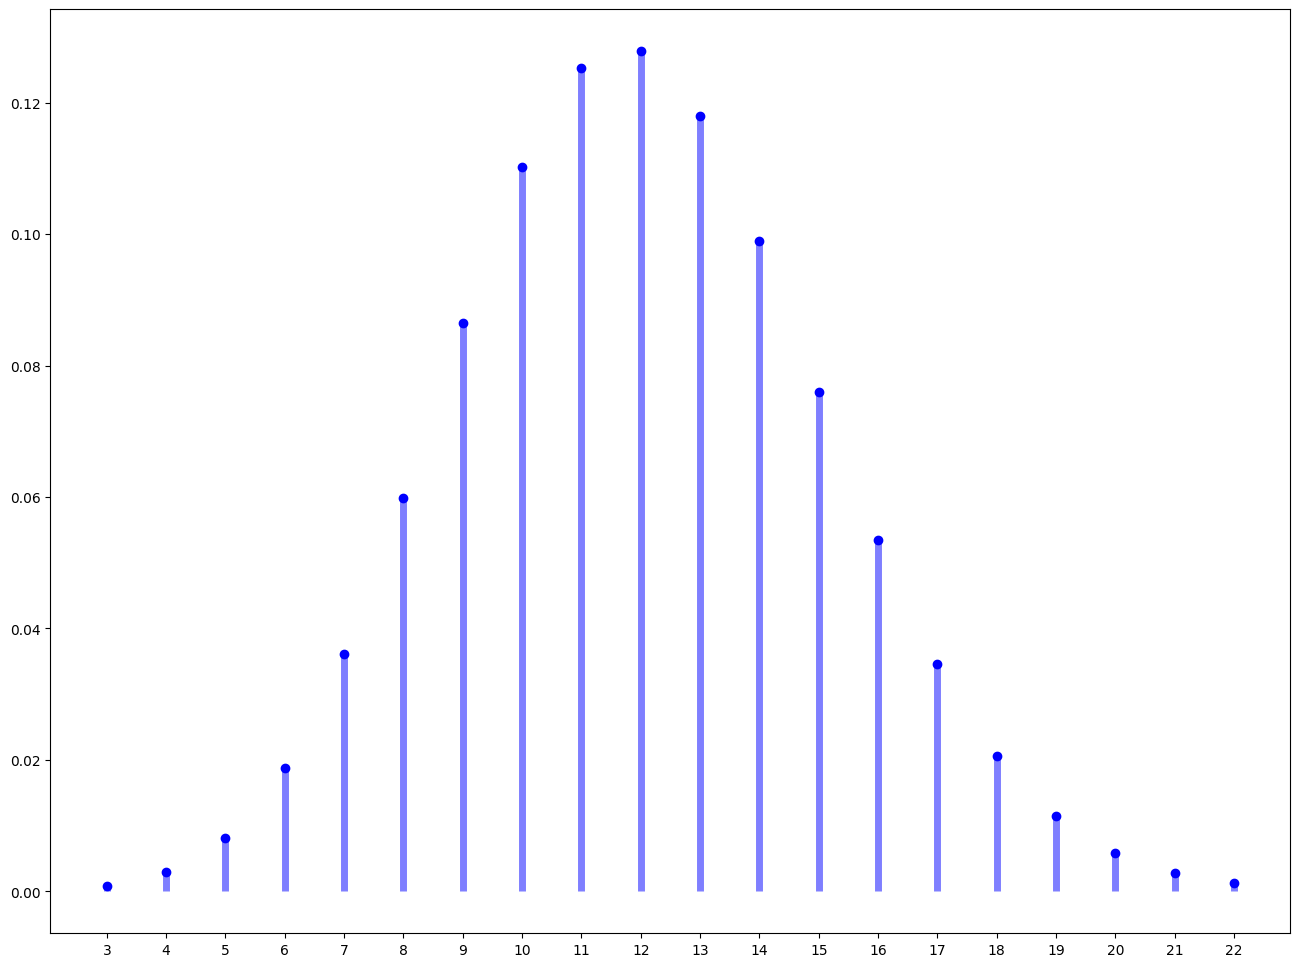

In [48]:
n, p = 60, 0.2
x = [i for i in range(3, 23)]
fig, ax = plt.subplots(1, 1,figsize=(16, 12));
ax.plot(x, binom.pmf(x, n, p), 'bo', label='binom pmf');
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5);
locs, labels = xticks();
xticks(np.arange(3, 23));

In [20]:
print(f'if C>=',get_binom_criterion(n=60,mu=0.2,alpha=0.05), 'then reject H0')

if C>= 18.0 then reject H0


А теперь давайте унифицируем расчеты и перейдем к p-value. Более унифицированный подход к отвержению или подтверждению гипотезы

In [21]:
def p_value_binom(n,q,mu=0.5):
    ''' Считает p-value
    
    Параметры:
        n: количество пациентов
        q: количество выздоровевших
    
    Возвращает:
        p-value для критерия
    '''
    
    binom_h0 = binom(n=n,p=mu) # строим график
    return 1 - binom_h0.cdf(q-1) # находим критическую область (где мы можем совершить ошибку)

In [22]:
print(f'if {p_value_binom(n=60,mu=0.5,q=37):0.5} <= alpha, then reject H0')

if 0.04623 <= alpha, then reject H0


## Работа с ростом